In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
epl = pd.read_csv("epl.csv")
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,FW,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,FW,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,2018-2019,1992,25,Chelsea,Spain,58500000,45000000,FW,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2016-2017,1985,30,Middlesbrough,Spain,8250000,6750000,FW,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,2018-2019,1989,28,West Ham United,England,13200000,9900000,DF,20,...,7,23,2,1,29,0,0,42,25,18


In [4]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 40 columns):
Player                   1468 non-null object
Season                   1468 non-null object
Born                     1468 non-null int64
Age                      1468 non-null int64
Squad                    1468 non-null object
Nation                   1468 non-null object
Previous Market Value    1468 non-null int64
Market Value             1468 non-null int64
Position                 1468 non-null object
App                      1468 non-null int64
Minutes                  1468 non-null int64
Goals                    1468 non-null int64
Passes                   1468 non-null int64
Assists                  1468 non-null int64
Yellow                   1468 non-null int64
Red                      1468 non-null int64
SubOn                    1468 non-null int64
SubOff                   1468 non-null int64
Shots                    1468 non-null int64
SOT                      1468 non

In [5]:
print(epl.columns)
epl.head(2)

Index(['Player', 'Season', 'Born ', 'Age', 'Squad', 'Nation',
       'Previous Market Value', 'Market Value', 'Position', 'App', 'Minutes',
       'Goals', 'Passes', 'Assists', 'Yellow', 'Red', 'SubOn', 'SubOff',
       'Shots', 'SOT', 'HitPost ', 'HeadClear', 'HeadGoal', 'PKScored',
       'FKGoal', 'Offsides', 'ThrBall', 'Misses', 'Corners', 'Crosses',
       'Blocks', 'Interceptions', 'Fouls', 'Last man ', 'Tackles', 'ELG',
       'OwnGoal', 'Clears', 'ABW', 'ABL'],
      dtype='object')


,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,FW,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,FW,31,...,4,6,41,0,13,0,0,20,54,59


Label Enconding

In [6]:
epl['Position'].value_counts()

MF    575
DF    527
FW    366
Name: Position, dtype: int64

In [7]:
cleanup_position={"Position":{"DF":1,"MF":2,"FW":3},
                  "Season":{"2015-2016":1,"2016-2017":2,"2017-2018":3,"2018-2019":4}}
epl.replace(cleanup_position,inplace=True)

In [20]:
epl.head()
epl.set_index(["Player","Season"])
epl.info()
#epl.sort_values(by=['Season','Player'],axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 40 columns):
Player                   1468 non-null object
Season                   1468 non-null int64
Born                     1468 non-null int64
Age                      1468 non-null int64
Squad                    1468 non-null object
Nation                   1468 non-null object
Previous Market Value    1468 non-null int64
Market Value             1468 non-null int64
Position                 1468 non-null int64
App                      1468 non-null int64
Minutes                  1468 non-null int64
Goals                    1468 non-null int64
Passes                   1468 non-null int64
Assists                  1468 non-null int64
Yellow                   1468 non-null int64
Red                      1468 non-null int64
SubOn                    1468 non-null int64
SubOff                   1468 non-null int64
Shots                    1468 non-null int64
SOT                      1468 non-n

Now I am going to break into Defenders, Midfielders, Forwards

In [32]:
X= epl.drop(["App",'Player','Squad',"Nation","Born ",'Minutes','Age'],axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

                 features  vif_factor
0                  Season    8.354851
1   Previous Market Value   10.607878
2            Market Value   11.386769
3                Position   12.210460
4                   Goals   13.518737
5                  Passes   11.933072
6                 Assists    4.198424
7                  Yellow    4.807165
8                     Red    1.154810
9                   SubOn    3.427921
10                 SubOff    4.332353
11                  Shots   34.627900
12                    SOT   34.028623
13               HitPost     2.327371
14              HeadClear   62.608260
15               HeadGoal    2.363947
16               PKScored    1.672666
17                 FKGoal    1.388674
18               Offsides    4.306205
19                ThrBall    3.203634
20                 Misses    4.179197
21                Corners    4.405437
22                Crosses    6.189128
23                 Blocks    7.551430
24          Interceptions   11.441758
25          

In [37]:
epl['Change'] =(epl['Market Value']-epl['Previous Market Value'])
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL,Change
0,Éder,1,1987,27,Swansea City,Portugal,5500000,4500000,3,13,...,0,11,0,4,0,0,7,9,20,-1000000
1,Álvaro Morata,3,1992,25,Chelsea,Spain,44000000,58500000,3,31,...,6,41,0,13,0,0,20,54,59,14500000
2,Álvaro Morata,4,1992,25,Chelsea,Spain,58500000,45000000,3,16,...,0,19,0,8,0,0,6,18,28,-13500000
3,Álvaro Negredo,2,1985,30,Middlesbrough,Spain,8250000,6750000,3,36,...,10,45,0,18,0,0,65,175,177,-1500000
4,Aaron Cresswell,4,1989,28,West Ham United,England,13200000,9900000,1,20,...,23,2,1,29,0,0,42,25,18,-3300000


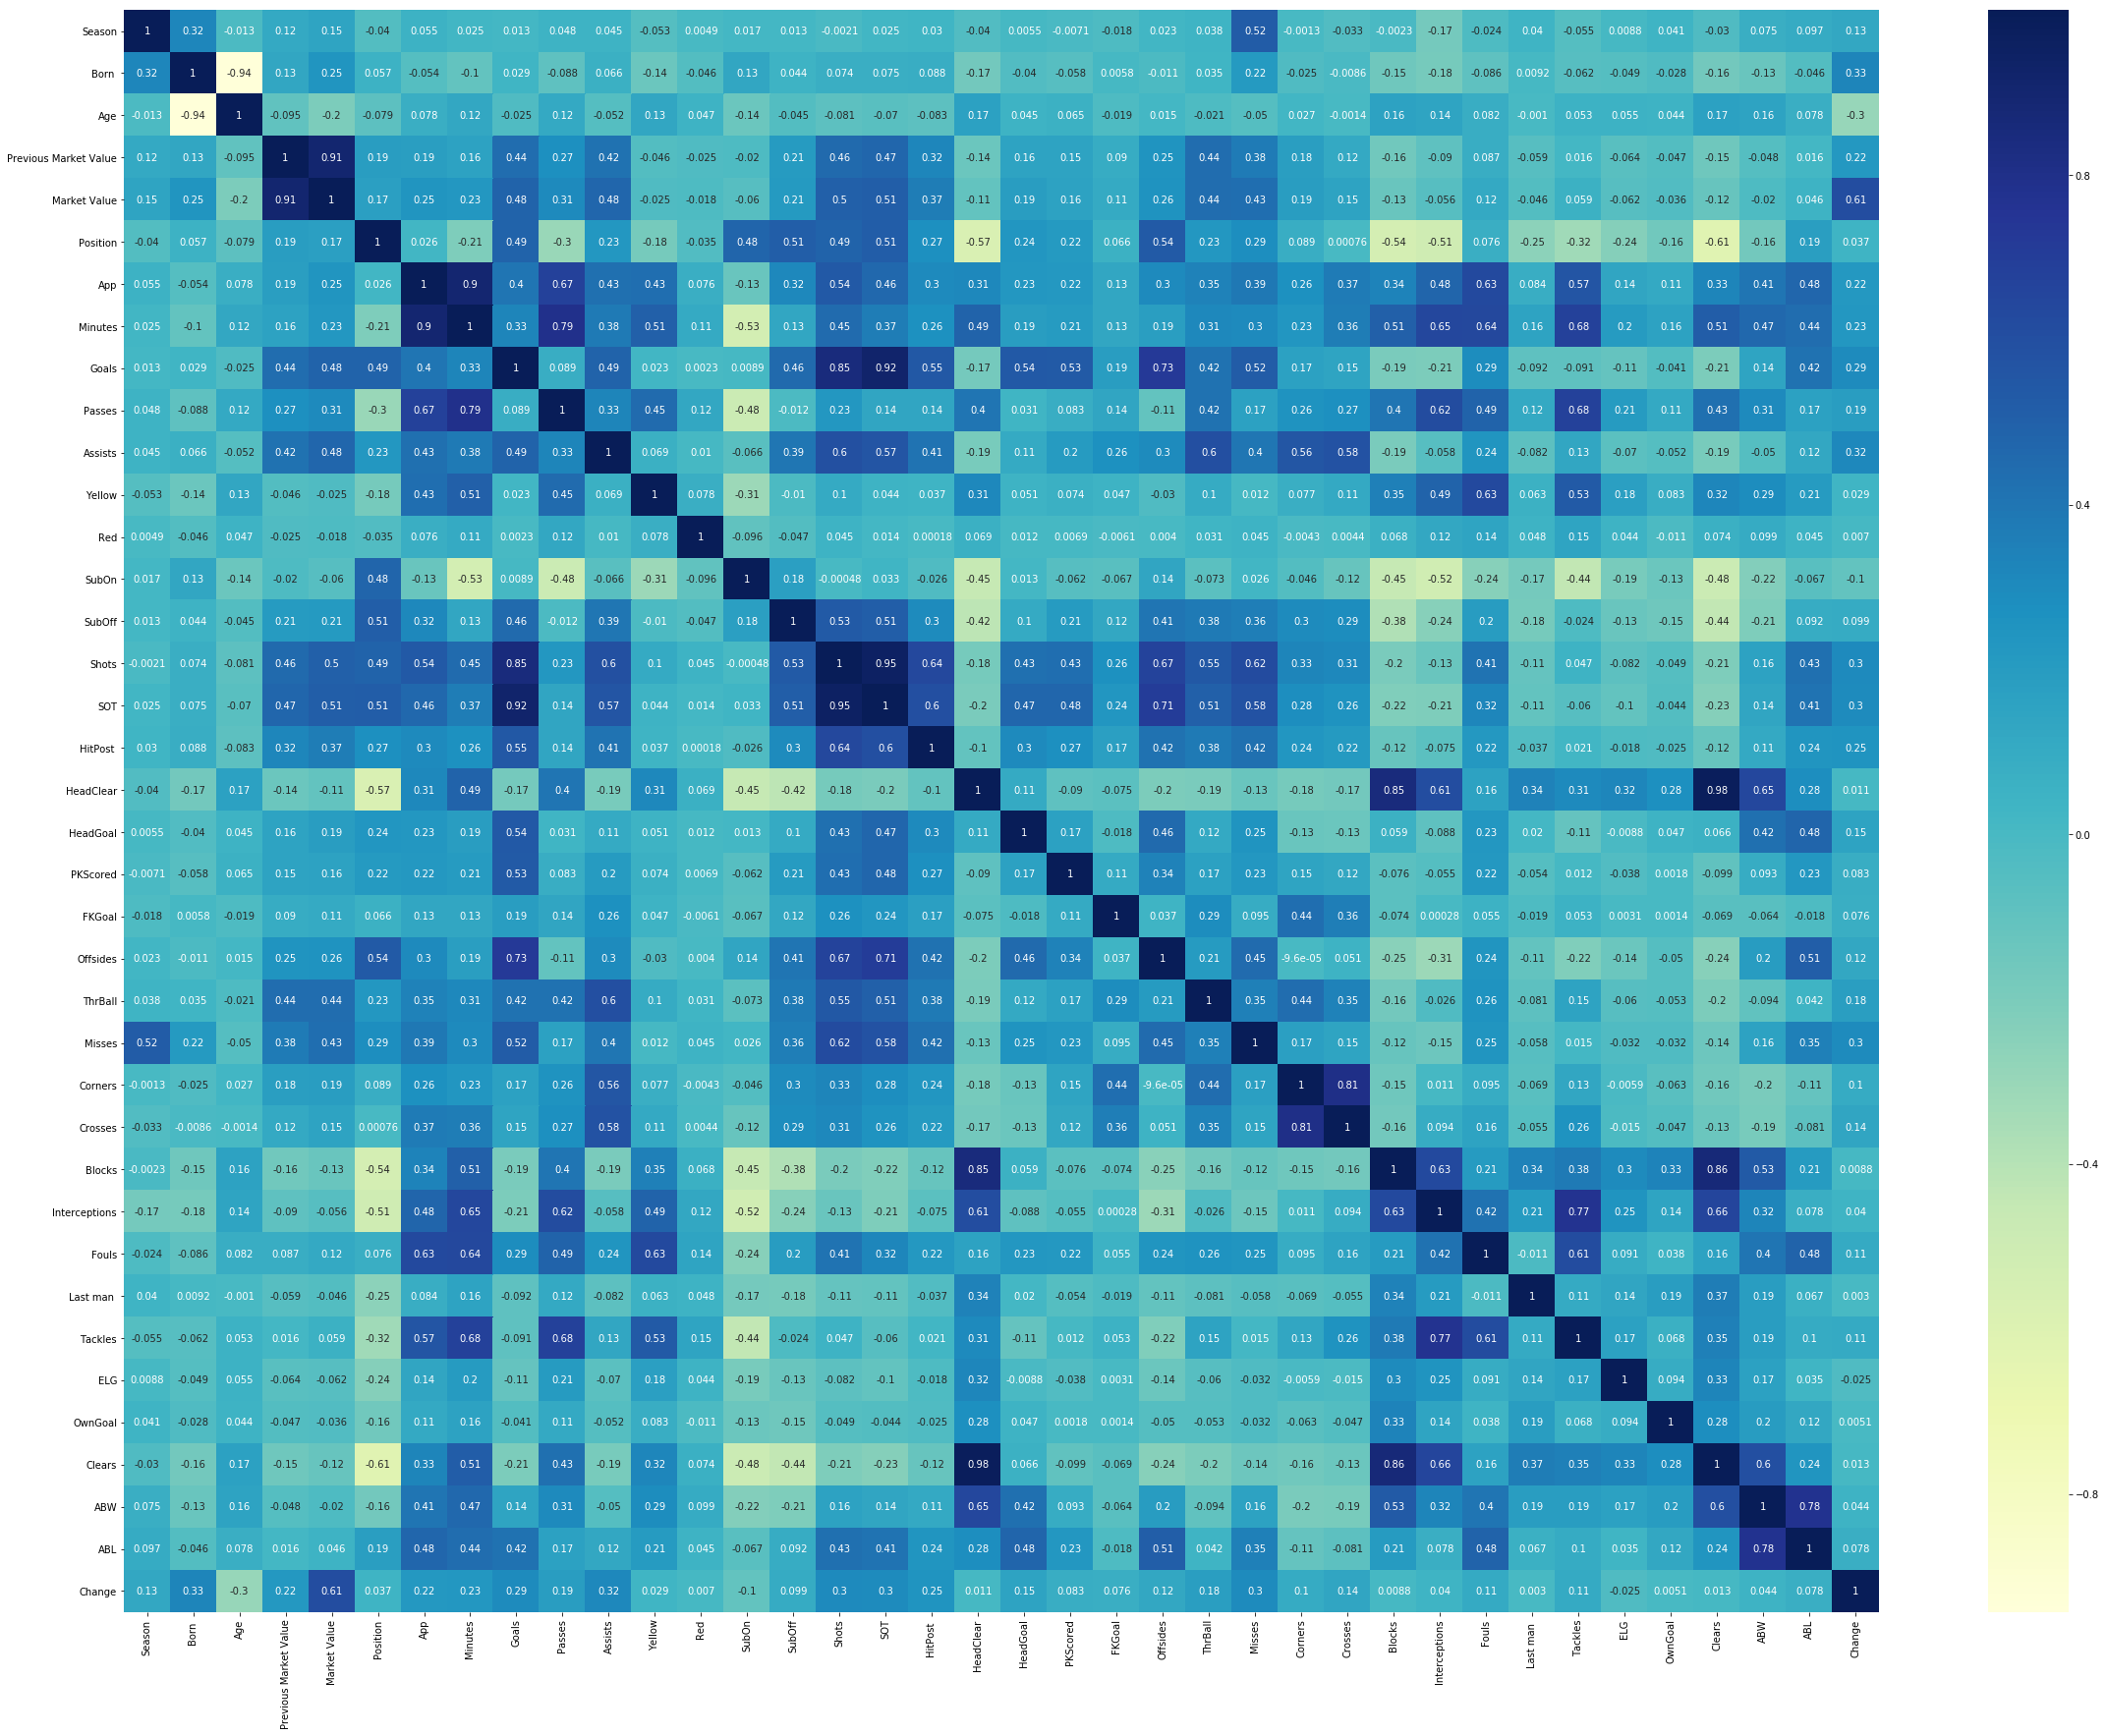

In [40]:
fig, ax = plt.subplots(figsize=(40,30))         # Sample figsize in inches
sns.heatmap(epl.corr(),annot=True, cmap="YlGnBu",ax=ax)
plt.show()

In [15]:
def APP (df):
    df_column = 1000*(df["Assists"])/df["App"]
    return df_column